In [3]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [6]:
# importar os dados para a limpeza:
dataset = pd.read_csv('tempo.csv', sep=';')
# visualizar os dádos
dataset.head()

Aparencia  Temperatura  Umidade       Vento Jogar
0       sol           85     85.0       FALSO   nao
1       sol           80     90.0  VERDADEIRO   nao
2   nublado           83     86.0       FALSO   sim
3     chuva           70      NaN       FALSO   sim
4     chuva           68     80.0       FALSO   sim

In [6]:
# tamanho dos dados
dataset.shape

(14, 5)

In [7]:
# 1° parte exploração dos dados categóricos e numérico (erros de domínios, valores, dados NANs, etc):
# 1.1 exploração dos dados categóricos(Aparencia, Vento e Jogar)
# 1.2 exploração dos dados numéricos(Temperatura e Umidade)
# 1.3 contar valores NANs
# 2° parte tratamento do dados:
# 2.1 Correção dos valores numéricos(Temperatura e Umidade)
# 2.1.1 correção de valores NANs e valores fora do domínio
# 2.2 Correção dos valores categóricos(Aparencia e Vento)
# 2.2.1 coreção de valores NANs e erro de padronização do domínio

In [8]:
# 1.1 exploração dados categóricos:
# Dados categóricos: Aparencia
agrupado = dataset.groupby(['Aparencia']).size()
agrupado
# Erro detectado: erro de domínio 'menos'

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

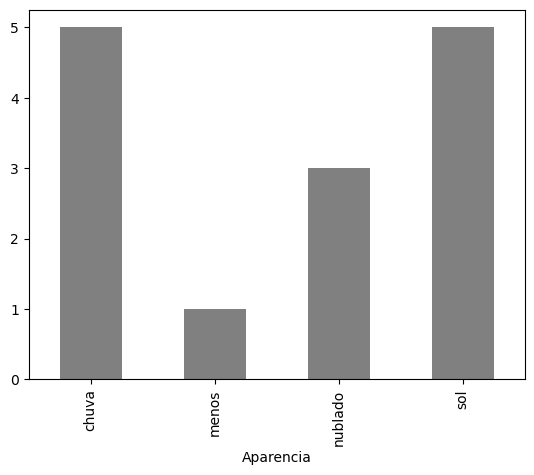

In [10]:
# gráfico de barra
agrupado.plot.bar(color = 'gray')

In [11]:
# dados categóricos: ventos
agrupado = dataset.groupby(['Vento']).size()
agrupado
# erro detectado: quantidade inferior

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

<Axes: xlabel='Vento'>

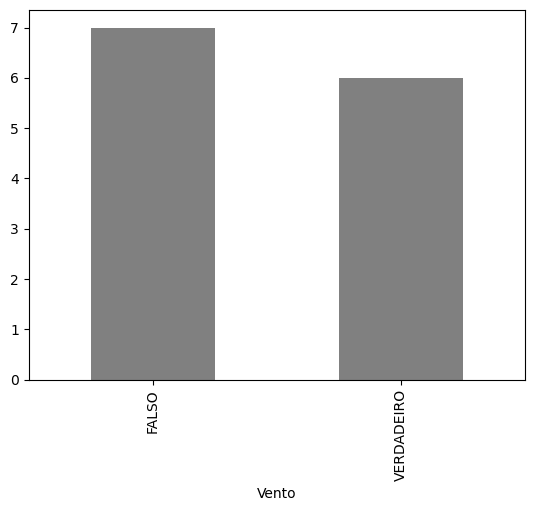

In [12]:
agrupado.plot.bar(color = 'gray')

In [13]:
# dados categóricos: jogar
agrupado = dataset.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

<Axes: xlabel='Jogar'>

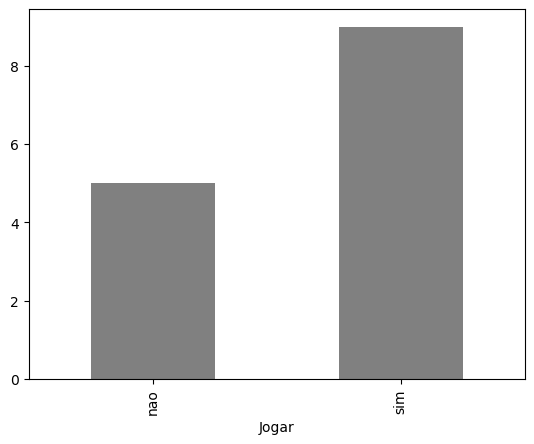

In [14]:
agrupado.plot.bar(color = 'gray')

In [15]:
# 1.2 exploração dados numéricos
# dados numéricos: Temperatura
# Análise descritiva 
dataset['Temperatura'].describe()
# erro analisados: valor acima do permitido

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Text(0.5, 1.0, 'Temperatura')

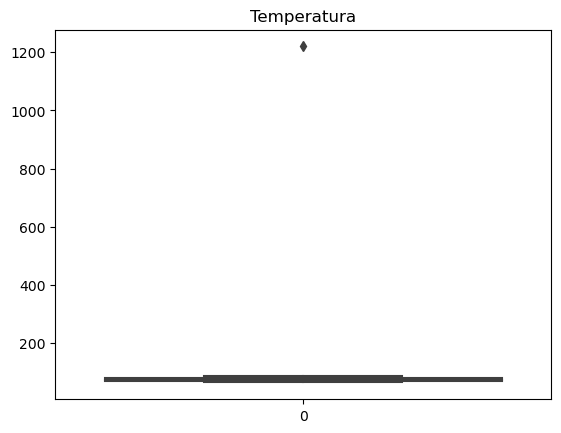

In [16]:
# gráfico de caixa
srn.boxplot(dataset['Temperatura']).set_title('Temperatura')

Text(0.5, 1.0, 'Temperatura')

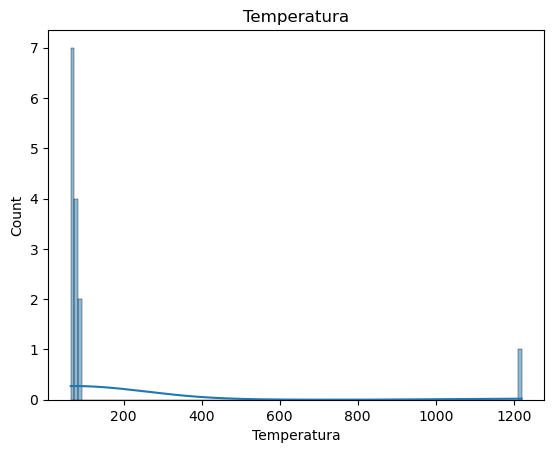

In [18]:
# gráfico histograma
srn.histplot(dataset['Temperatura'], kde=True).set_title('Temperatura')

In [19]:
# dados numérico: Umidade
dataset['Umidade'].describe()
# erro analizado: valor acima do permitido

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Text(0.5, 1.0, 'Umidade')

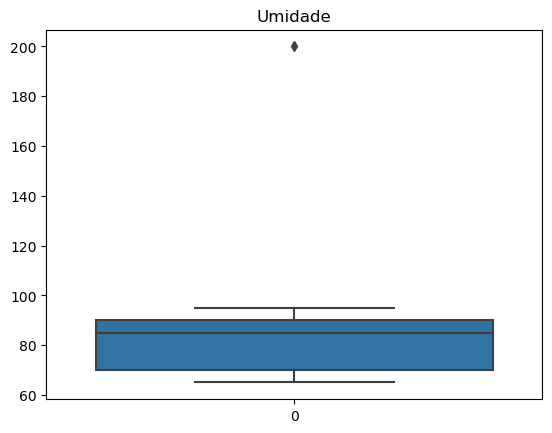

In [21]:
srn.boxplot(dataset['Umidade']).set_title('Umidade')

Text(0.5, 1.0, 'Umidade')

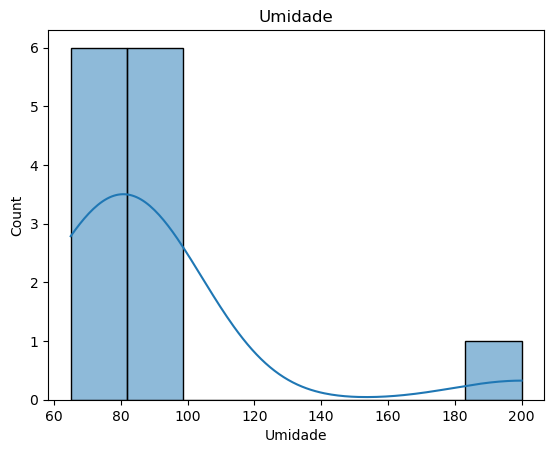

In [22]:
srn.histplot(dataset['Umidade'], kde=True).set_title('Umidade')

In [23]:
#1.3 Contar valores NANs
dataset.isnull().sum()
# valores NANs detectados foram em 'Umidade' e 'Vento'

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [24]:
# 2° Tratamento dos dados:
# 2.1 dados numéricos:
# Temperatura, erros(1°valor acima do permitido)
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [25]:
# 1° valor acima do permitido
# determinado o valor da sua mediana
mediana = sts.median(dataset['Temperatura'])
mediana

73.5

In [27]:
# analisando os valores acima de 130°
dataset.loc[(dataset['Temperatura'] < -130)|(dataset['Temperatura'] > 130)]

Aparencia  Temperatura  Umidade  Vento Jogar
7       sol         1220     95.0  FALSO   nao

In [28]:
# corrigindo o erro, mudando o valor para a sua mediana
dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = mediana
# checar se houve a correção
dataset.loc[dataset['Temperatura'] > 130]

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []

In [29]:
# 2.1 Dados numéricos:
# Umidade, erros (1° valor acima e 2° valor NANs)
dataset['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [7]:
# determinando o valor da mediana
mediana = sts.median(dataset['Umidade'])
mediana

85.5

In [8]:
# 2° valor NANs
dataset['Umidade'].isnull().sum()

1

In [32]:
# subistituir NAN por mediana
dataset['Umidade'].fillna(mediana, inplace=True)
# verificar se NAN não existe mais
dataset['Umidade'].isnull().sum()

0

In [35]:
# analiasr os valores fora do domínio
dataset.loc[(dataset['Umidade'] < 0)|(dataset['Umidade'] > 100)]

Aparencia  Temperatura  Umidade Vento Jogar
9     chuva         75.0    200.0   NaN   sim

In [9]:
# substituir valor fora do domínio pela mediana
dataset.loc[dataset['Umidade'] > 100, 'Umidade'] = mediana
# checar a correção:
dataset.loc[dataset['Umidade'] > 100]

Empty DataFrame
Columns: [Aparencia, Temperatura, Umidade, Vento, Jogar]
Index: []

In [37]:
# 2.1 Tratamento de dados
# 2.2 Tratamendo dos dados categóricos
# Aparencia, erros(de domínio)
agrupado = dataset.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [43]:
# substituir valor invalido pela moda ('Sol')
dataset.loc[dataset['Aparencia'] == 'menos', 'Aparencia'] = 'sol'
# visualizar o resultado
agrupado = dataset.groupby(['Aparencia']).size()
agrupado


Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [44]:
# 2.2 Tratamento de dados categóricos
# vento, erro(valor NAN)
agrupado = dataset.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [45]:
# verificar a quantidade de valores NANs
dataset['Vento'].isnull().sum()

1

In [46]:
# substituir valor NAN pela moda ('FALSO')
dataset['Vento'].fillna('FALSO', inplace=True)
# verificar se tem valor NAN
dataset['Vento'].isnull().sum()

0

In [47]:
# verificar a categoria Vento
agrupado = dataset.groupby(['Vento']).size()
agrupado 

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

In [48]:
dataset.head()

Aparencia  Temperatura  Umidade       Vento Jogar
0       sol         85.0     85.0       FALSO   nao
1       sol         80.0     90.0  VERDADEIRO   nao
2   nublado         83.0     86.0       FALSO   sim
3     chuva         70.0     85.5       FALSO   sim
4     chuva         68.0     80.0       FALSO   sim

In [49]:
dataset.shape

(14, 5)